<a href="https://colab.research.google.com/github/annakthrnlee/FIFA_World_Cup/blob/lee1/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload dataset
# Create supervised machine learning model 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import and read Revised_International_matches.csv 
from google.colab import files
 
 
uploaded = files.upload()

Saving Revised_International_Matches.csv to Revised_International_Matches (4).csv


In [4]:
# Import and read the dataset
import pandas as pd 
Revised_Matches_df = pd.read_csv("Revised_International_Matches.csv")
Revised_Matches_df.head()

,Unnamed: 0,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,tournament,country,home_team_result
0,0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,FIFA World Cup qualification,Bolivia,Win
1,1,1993-08-08,Brazil,Mexico,South America,North America,8,14,Friendly,Brazil,Draw
2,2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,FIFA World Cup qualification,Ecuador,Win
3,3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,Friendly,Guinea,Win
4,4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,FIFA World Cup qualification,Paraguay,Lose


In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf

In [6]:
# Determine the number of unique values in each column
Revised_Matches_df.nunique()

Unnamed: 0             23921
date                    5550
home_team                211
away_team                211
home_team_continent        6
away_team_continent        6
home_team_fifa_rank      211
away_team_fifa_rank      211
tournament                82
country                  217
home_team_result           3
dtype: int64

In [7]:
# Look at nationality_name value counts for binning
home_continent_counts = Revised_Matches_df.loc[:, "home_team_continent"].value_counts()
home_continent_counts

Europe           7593
Africa           5885
Asia             5302
North America    2772
South America    1839
Oceania           530
Name: home_team_continent, dtype: int64

In [8]:
# Look at country value counts for binning
country_counts = Revised_Matches_df.loc[:, "country"].value_counts()
country_counts

USA                      1003
South Africa              505
United Arab Emirates      462
Qatar                     461
France                    445
                         ... 
Réunion                     2
Afghanistan                 2
Tahiti                      2
Saint Martin                2
Serbia and Montenegro       1
Name: country, Length: 217, dtype: int64

In [9]:
# Look at rank value counts for binning
home_rank_counts = Revised_Matches_df.loc[:, "home_team_fifa_rank"].value_counts()
home_rank_counts

22     214
3      209
29     203
5      198
11     198
      ... 
210     12
207     11
209     11
208      8
211      6
Name: home_team_fifa_rank, Length: 211, dtype: int64

In [10]:
# Look at rank value counts for binning
away_rank_counts = Revised_Matches_df.loc[:, "away_team_fifa_rank"].value_counts()
away_rank_counts

1      195
29     189
14     188
38     184
18     183
      ... 
207     17
210     13
209     12
208      8
211      5
Name: away_team_fifa_rank, Length: 211, dtype: int64

In [11]:
# Let's just see continent home and away games played
Revised_Matches_df['home_team_continent'] # Step 1

0        South America
1        South America
2        South America
3               Africa
4        South America
             ...      
23916           Europe
23917           Europe
23918    South America
23919             Asia
23920             Asia
Name: home_team_continent, Length: 23921, dtype: object

In [12]:
Revised_Matches_df['home_team_continent'].value_counts() # Step 2

Europe           7593
Africa           5885
Asia             5302
North America    2772
South America    1839
Oceania           530
Name: home_team_continent, dtype: int64

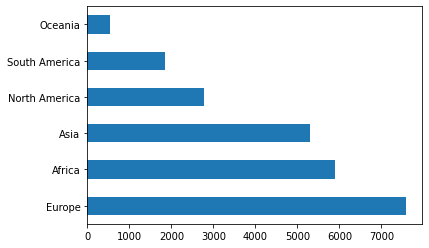

In [13]:
# ADDED a few random visualizations (ignore but may use for week 2)
# Displays the amount of games played per continent (home) over a 22 year period
Revised_Matches_df['home_team_continent'].value_counts()[:20].plot(kind='barh')

In [14]:
Revised_Matches_df['away_team_continent'] # Step 1

0        South America
1        North America
2        South America
3               Africa
4        South America
             ...      
23916           Europe
23917           Europe
23918           Africa
23919           Africa
23920           Africa
Name: away_team_continent, Length: 23921, dtype: object

In [15]:
Revised_Matches_df['away_team_continent'].value_counts() # Step 2

Europe           7359
Africa           6306
Asia             4817
North America    2703
South America    2161
Oceania           575
Name: away_team_continent, dtype: int64

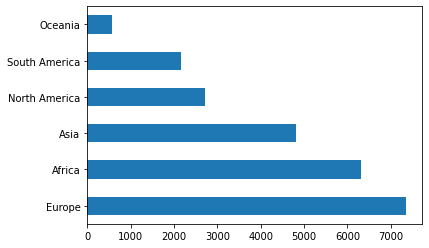

In [16]:
# Displays the amount of games played per continent (away) over a 22 year period
# Can confirm results of games played home or away won't change based on either column
Revised_Matches_df['away_team_continent'].value_counts()[:20].plot(kind='barh')

In [17]:
# Generate our categorical variable list
home_results = Revised_Matches_df.dtypes[Revised_Matches_df.dtypes == "object"].index.tolist()

In [18]:
# Check the number of unique values in each column
Revised_Matches_df[home_results].nunique()

date                   5550
home_team               211
away_team               211
home_team_continent       6
away_team_continent       6
tournament               82
country                 217
home_team_result          3
dtype: int64

In [21]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Revised_Matches_df[home_results]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(home_results)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,date_1993-08-08,date_1993-08-09,date_1993-08-11,date_1993-08-15,date_1993-08-22,date_1993-08-25,date_1993-08-29,date_1993-08-31,date_1993-09-05,date_1993-09-06,...,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Yemen,country_Zambia,country_Zimbabwe,home_team_result_Draw,home_team_result_Lose,home_team_result_Win
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Merge one-hot encoded features and drop the originals
Revised_Matches_df = Revised_Matches_df.merge(encode_df,left_index=True, right_index=True)
Revised_Matches_df = Revised_Matches_df.drop(home_results,1)
Revised_Matches_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,home_team_fifa_rank,away_team_fifa_rank,date_1993-08-08,date_1993-08-09,date_1993-08-11,date_1993-08-15,date_1993-08-22,date_1993-08-25,date_1993-08-29,...,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Yemen,country_Zambia,country_Zimbabwe,home_team_result_Draw,home_team_result_Lose,home_team_result_Win
0,0,59,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,8,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,35,94,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,65,86,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,67,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = Revised_Matches_df["home_team_result_Win"].values 
X = Revised_Matches_df.drop(["home_team_result_Lose","home_team_result_Win"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [24]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               628800    
                                                                 
 dense_23 (Dense)            (None, 80)                8080      
                                                                 
 dense_24 (Dense)            (None, 10)                810       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 637,701
Trainable params: 637,701
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
561/561 [==============================] - 7s 11ms/step - loss: 1.9054 - accuracy: 0.5887
Epoch 2/100
561/561 [==============================] - 5s 9ms/step - loss: 0.9733 - accuracy: 0.6486
Epoch 3/100
561/561 [==============================] - 5s 9ms/step - loss: 0.6718 - accuracy: 0.6837
Epoch 4/100
561/561 [==============================] - 4s 8ms/step - loss: 0.6366 - accuracy: 0.6940
Epoch 5/100
561/561 [==============================] - 4s 8ms/step - loss: 0.6386 - accuracy: 0.7019
Epoch 6/100
561/561 [==============================] - 4s 8ms/step - loss: 0.5676 - accuracy: 0.7281
Epoch 7/100
561/561 [==============================] - 5s 9ms/step - loss: 0.5702 - accuracy: 0.7287
Epoch 8/100
561/561 [==============================] - 5s 9ms/step - loss: 0.5496 - accuracy: 0.7351
Epoch 9/100
561/561 [==============================] - 4s 8ms/step - loss: 0.5288 - accuracy: 0.7487
Epoch 10/100
561/561 [==============================] - 4s 8ms/step - loss: 0.5007 - accur

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

187/187 - 1s - loss: 0.4689 - accuracy: 0.7902 - 640ms/epoch - 3ms/step
Loss: 0.4689093232154846, Accuracy: 0.7901688814163208
